<h1>DEEP-EMOTIVE</h1>
<h2>Trabalho de conclusão de curso - Ciência da Computação  - FURB - 2017</h2>
<h3>Autor: Diogenes Ademir Domingos<br>
 Modulo de detecção da face</h3>

Deep-Emotive é um protótipo para reconhecer e classificar as expressões faciais das emoções, alegria, desgosto, medo, raiva, surpresa, tristeza, consideradas por Ekman et al. (1987), como básicas e universais, utilizando técnicas já consolidadas das áreas de Processamento Digital de Imagem e Visão Computacional. Estas técnicas são combinadas com uma nova abordagem, considerada a mais avançada no reconhecimento visual de objetos através do aprendizado de máquina, o Aprendizado Profundo ou Deep Learning. 


In [16]:
# Bibliotecas necessárias para execução do módulo de detecção da face
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import os
import numpy as np

%matplotlib inline
print(cv2.__version__)

3.3.0


In [17]:
# Criar instancia do classificar
def _criar_classificador_face(opencv):
    """ Esta função é responsável por criar uma instancia do
        classificador Viola-Jones, implementado pela
        biblioteca opencv. Recebe como entrada uma objeto opencv
        e retorna o classificador
        localizada

        Args:
            opencv (obj): objeto da biblioteca opencv.

        Returns:
            obj: classificador Viola-Jones.
    """ 
    # caminho absoluto do classificador em cascata da biblioteca OpenCV
    cascade_file_src = "./opencv/sources/data/haarcascades/haarcascade_frontalface_default.xml"
    # cria a instancia do objeto classificador
    faceCascade = opencv.CascadeClassifier(cascade_file_src)
    return faceCascade

In [18]:
# detectando faces na imagem
def _identificar_face(imagem, classificador, dimensao=1.2, vizinhos=5):
    """ Esta função é responsável por reconhecer uma face na imagem.
        Recebe como entrada uma objeto de imagem python e retorna tupla
        contendo a localização espacial (x1,y1,x2,y2), onde a face está
        localizada

        Args:
            imagem (PIL): objeto de imagem python.

        Returns:
            tuple: tupla contendo a localização espacial (x1,y1,x2,y2).
    """    
    # Aplica a técnica de Viola-Jones para identificação das
    # regiões de interesse (detectMultiScale).
    # As regiões de interresse passadas por um classificar em cascata (faceCascade)
    face = classificador.detectMultiScale(imagem , dimensao, vizinhos)
    return face

In [19]:
# Segmentação da região de interesse.
def segmentar_uma_face(imagem, box, opencv):
    """ Esta função é responsável por desenhar a bounding box
        da face na imagem. Recebe como entrada uma imagem
        e uma tupla contendo a localização espacial (x1,y1,x2,y2), 
        onde a face está localizada.

        Args:
            imagem (PIL): objeto de imagem python.
            box (tuple): tupla contendo a localização 
            espacial (x1,y1,x2,y2).
        
        Returns:
            imagem: imagem com o desenho da bounding box
    """ 
    crop = []
    for (x, y, w, h) in box:
        opencv.rectangle(imagem,
                      (x, y),      # limites espaciais
                      (x+w, y+h),  # largura e altura
                      (0, 255, 0), # cor da caixa
                      2)           # tipo da linha desenhada
        #recorte = imagem[y+2: (y+h)-2, x+2: (x+w)-2] # recorte
        recorte = imagem[y: (y+h), x: (x+w)] # recorte
        crop.append(recorte)
    return crop

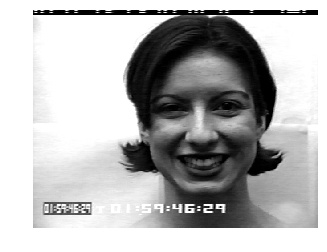

In [20]:
# Importar uma imagem para teste do classificador
imagePath = './imagens/alegria/S010_006_00000015.png'
imagem = cv2.imread(imagePath)
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

plt.axis('off')
plt.imshow(imagem_cinza, cmap='gray')
plt.show()

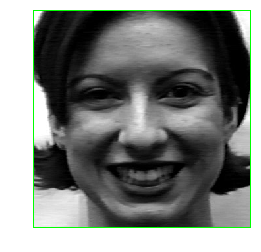

In [21]:
face_cascade = _criar_classificador_face(cv2)
box = _identificar_face(imagem, face_cascade)
imagem_segmentada = segmentar_uma_face(imagem, box, cv2)
imgg = Image.fromarray(imagem_segmentada[0])


plt.axis('off')
plt.imshow(imgg)
plt.show()

In [22]:
# Segmentando todas as imagens da base de dados
# diretorio database imagens
path1 = './imagens'    #path of folder of images    
path2 = './faces'  #path of folder to save images

In [23]:
# listando a quantidade de pastas no diretório imagens
# Os diretórios dão origem as classes = ['alegria', 'desgosto', 'desprezo', 'medo', 'neutral', 'raiva', 'surpresa', 'tristeza']
classes_emocoes = os.listdir(path1)
num_emocoes = len(classes_emocoes)
print("Quantidade de emoções: ",num_emocoes)
print(classes_emocoes)

Quantidade de emoções:  8
['alegria', 'desgosto', 'desprezo', 'medo', 'neutral', 'raiva', 'surpresa', 'tristeza']


In [24]:
def carregar_imagens(path):
    """ Esta função é responsável por importar as imagens para 
        o protótipo. Recebe como entrada o caminho do diretório
        onde as imagens estão localizadas. Retorna uma lista 
        de tuplas de duas posições. A primeira posição é o
        objeto de imagem e a segunda é a emoção da imagem.

        Args:
            path (string): caminho do diretório onde as imagens 
            estão localizadas.

        Returns:
            tuple (len=2): tupla contendo objeto imagem e emoção.
    """  
    imagens = [] # lista para guardar as faces segmentadas
    classes_emocoes = os.listdir(path)
    for emocao in range(len(classes_emocoes)): # para cada categoria(emoção)
        
        m_path = os.path.join(path, classes_emocoes[emocao])  # path src
        # pega todos os arquivos da emocao
        files = [f for f in os.listdir(m_path)]
        
        print('Carregando imagens de {}, qtd: {}...'.format(classes_emocoes[emocao], len(files)))
        for file in files:  # para cada imagem
            
            path_img = m_path + '\\' + file #caminho absoluto
            im = Image.open(path_img) # obj PIL
            imagens.append((im, emocao)) # insere face an lista
            
    print('Imagens carregadas com sucesso!')
    print('Quantidade de imagens: ',len(imagens))
    return imagens

In [25]:
imagens = carregar_imagens(path1)

Carregando imagens de alegria, qtd: 71...
Carregando imagens de desgosto, qtd: 61...
Carregando imagens de desprezo, qtd: 18...
Carregando imagens de medo, qtd: 25...
Carregando imagens de neutral, qtd: 123...
Carregando imagens de raiva, qtd: 45...
Carregando imagens de surpresa, qtd: 82...
Carregando imagens de tristeza, qtd: 28...
Imagens carregadas com sucesso!
Quantidade de imagens:  453


In [26]:
def segmentar_faces(imagens, formato='.png'):
    """ Esta função é responsável por segmentar
        a face na imagem. Recebe como entrada uma 
        lista de tuplas (imagens,emocao). Retornar a 
        uma lista de tuplas (faces,emocao) extraídas de cada imagem.

        Args:
            imagens (list): lista de tuplas (imagens,emocao) 

        Returns:
            list: uma lista de tuplas (faces,emocao).
    """
    faces = [] # lista para guardar as faces segmentadas
    face_cascade = _criar_classificador_face(cv2)  # classificador
    print('Segmentando faces, por favor aguarde...')
    for i, (imagem, emocao) in enumerate(imagens):

        box = _identificar_face(np.asarray(imagem), 
                            face_cascade) # encontra face       
        for (x, y, w, h) in box: # bounding box
            # recorta a região de interesse
            crop_im = imagem.crop((x, y, x+w, y+h)).resize((224,224))
            faces.append((crop_im, emocao)) # insere face an lista

    print('Segmentação de faces concluida com sucesso!')
    print('Quantidade de faces segmentadas: ',len(faces))
    return faces

In [27]:
faces = segmentar_faces(imagens)

Segmentando faces, por favor aguarde...
Segmentação de faces concluida com sucesso!
Quantidade de faces segmentadas:  453


In [28]:
def _criar_diretorio_faces(path, classes_emocoes):
    """ Esta função é responsável por criar a nova
        base de dados para as faces segmentadas.
        Recebe como parâmentro o diretorio da 
        nova base de dados, e uma lista contendo as 
        emoções. Para cada emoção é criado um diretório

        Args:
            path (string): caminho absolutor para nova base
            classes_emocoes (list): lista com cada categoria
            a ser criada.
    """
    print('Criando diretorios...')
    for emocao in range(len(classes_emocoes)):
        m_path = os.path.join(path, classes_emocoes[emocao]) # path dst
        #verifica se o existe o diretório
        if not os.path.exists(m_path):
            os.mkdir(m_path)
    print('Diretorios criados com sucesso!')

In [29]:
def salvar_faces(path, faces, classes_emocoes, formato='.png'):
    """ Esta função é responsável por salvar 
        as faces segmentadas na nova base de dados.
        Recebe como parâmentro o caminho da base de dados.
        A lista contendo as faces segmentadas.
        A lista contendo as emoções categorizadas
        O formato que deseja salvar as imagens

        Args:
            path (string): caminho absolutor para nova base
            face (list): lista com as faces segmentadas
            classes_emocoes (list): lista com cada categoria
            a ser criada.
            formato (string): extensão da imagem
    """
    
    print('Salvando faces, por favor aguarde...')
    # Cria a base de dados
    _criar_diretorio_faces(path,classes_emocoes)
    
    # para cada face
    for i, face in enumerate(faces):
        # Cria o caminho do diretório
        m_path = os.path.join(path, classes_emocoes[face[1]]) # path dst
        # Cria o caminho do arquivo
        file = m_path + '\\' + str(classes_emocoes[face[1]]) + '_img' + str(i) + formato
        # se não existir salva a imagem
        if not os.path.exists(file):
            face[0].save(m_path + '\\' + str(classes_emocoes[face[1]]) + '_img' + str(i) + formato)
            
    print('Faces salvas com sucesso!')

In [30]:
salvar_faces(path2, faces, classes_emocoes)

Salvando faces, por favor aguarde...
Criando diretorios...
Diretorios criados com sucesso!
Faces salvas com sucesso!
